# 1. Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

# 2. Making the DataFrame

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 3. Checking for NULL Values

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 4. Plotting the Histogram of all Numeric Inputs

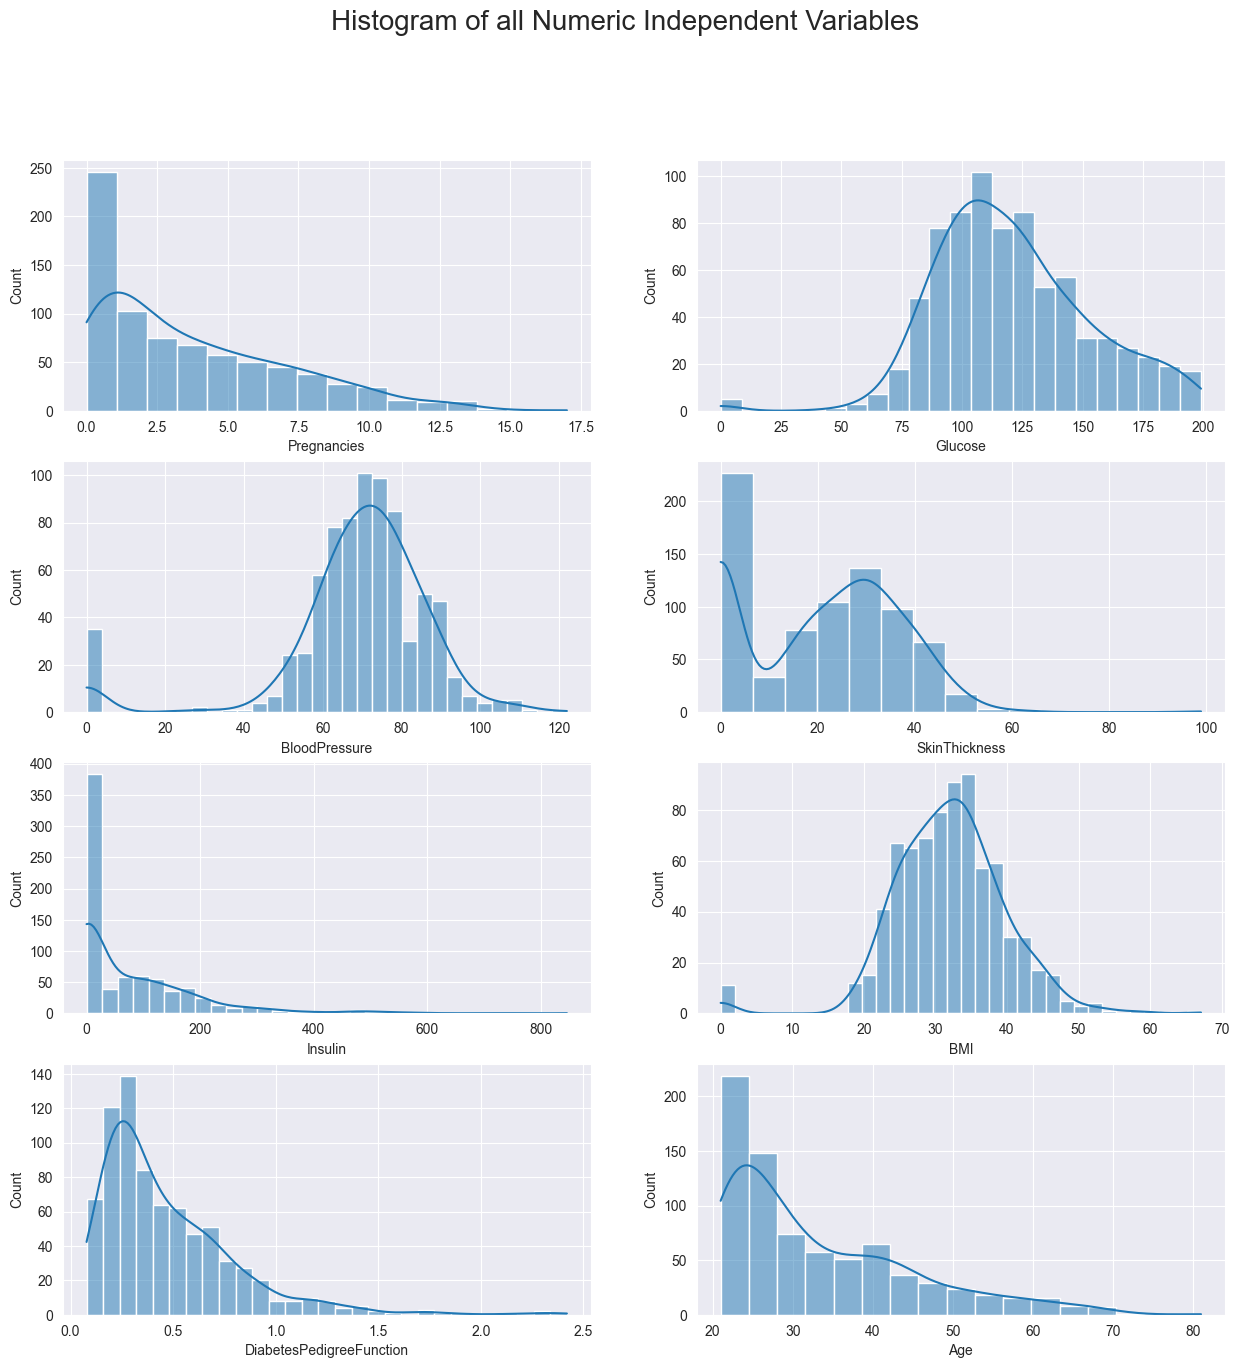

In [5]:
numeric_val = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age',]
plt.figure(figsize=(15,15))
plt.suptitle("Histogram of all Numeric Independent Variables",fontsize=20)
for i,j in enumerate(numeric_val):
    plt.subplot(4,2,i+1)
    ax = sns.histplot(df[j],kde=True)
    ax.plot()
plt.show()

# 5. Box-Plot of all Numeric Inputs

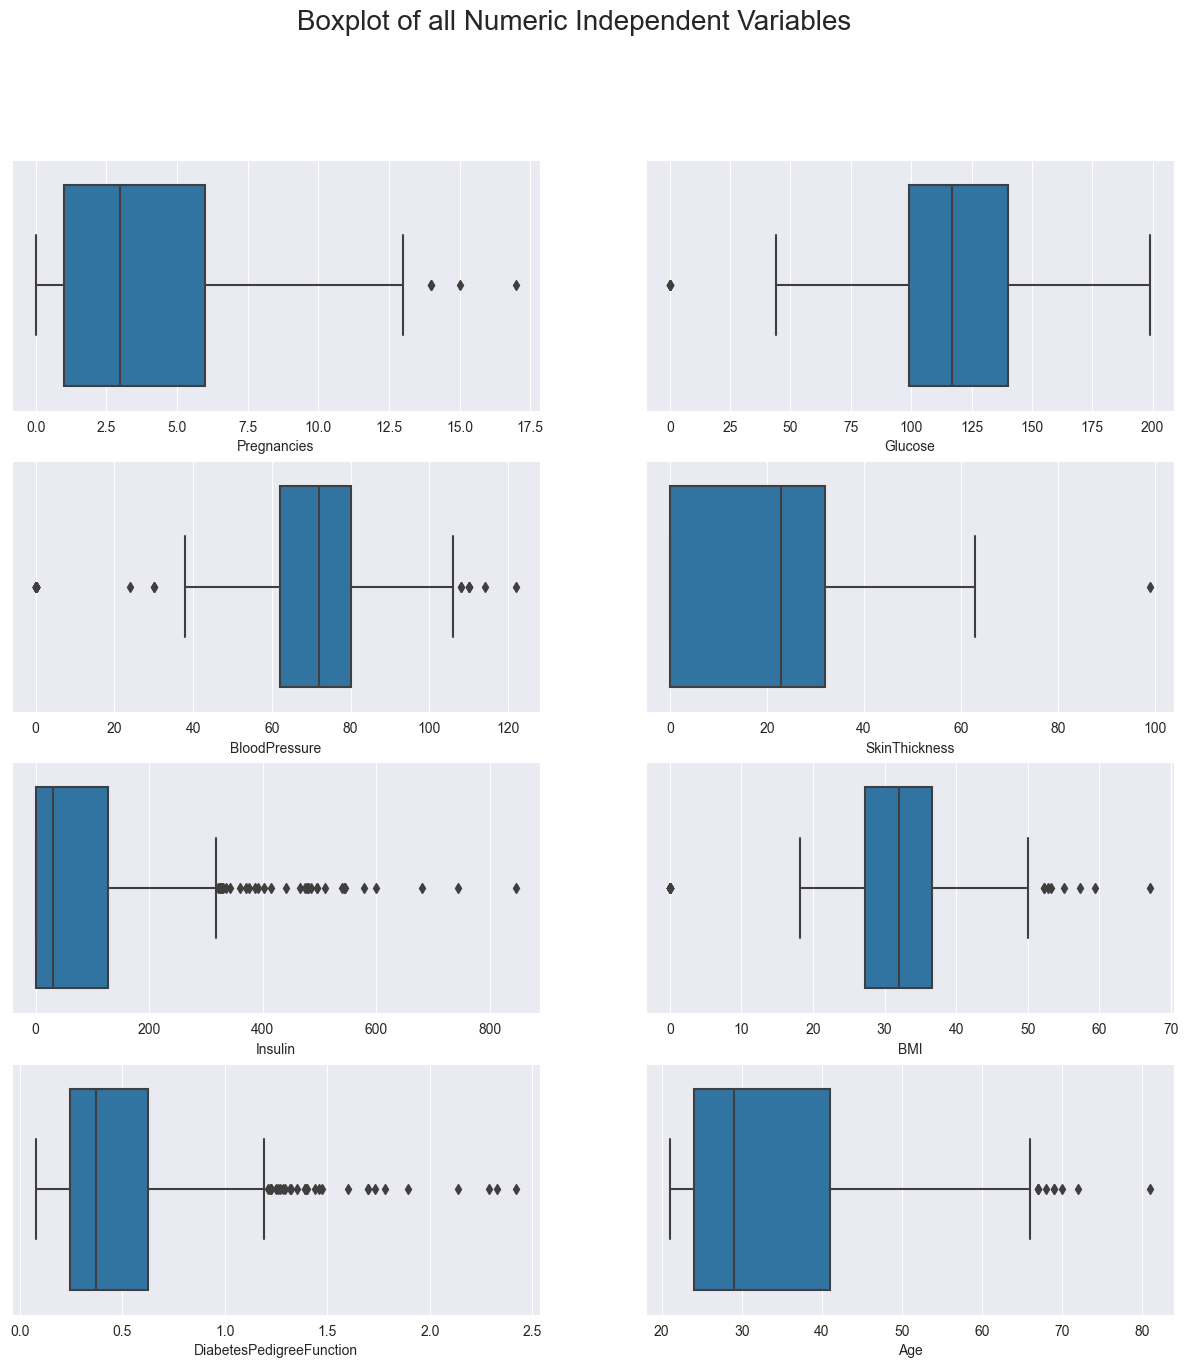

In [6]:
plt.figure(figsize=(15,15))
plt.suptitle("Boxplot of all Numeric Independent Variables",fontsize=20)
for i,j in enumerate(numeric_val):
    plt.subplot(4,2,i+1)
    ax = sns.boxplot(x = df[j])
    ax.plot()
plt.show()

# 6. Mapping the Correlation

### 6.1. Without considering the Output 

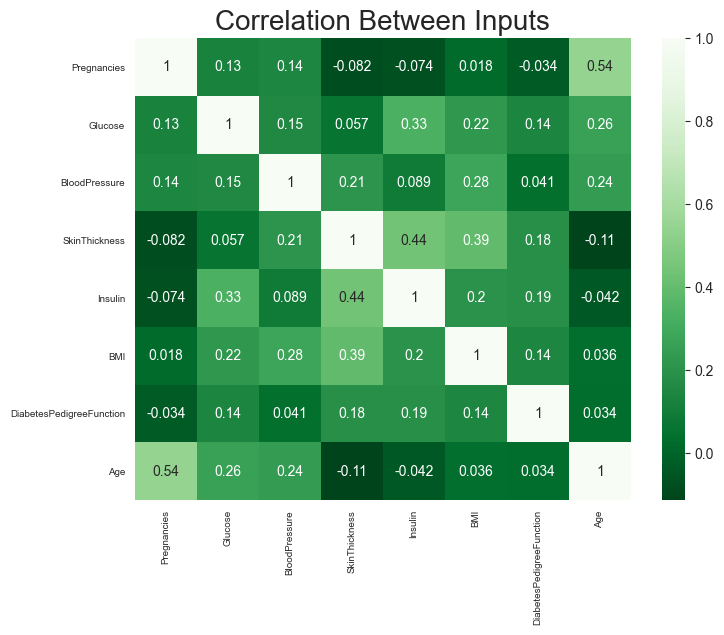

In [7]:
without_output = df.iloc[:,:-1]
plt.figure(figsize=(8,6))
ax = sns.heatmap(data = without_output.corr() , annot=True , cmap="Greens_r")
ax.tick_params(axis='x',labelsize=7)
ax.tick_params(axis='y',labelsize=7)
plt.title("Correlation Between Inputs",fontsize=20)
plt.show()

### 6.2. With considering the Output

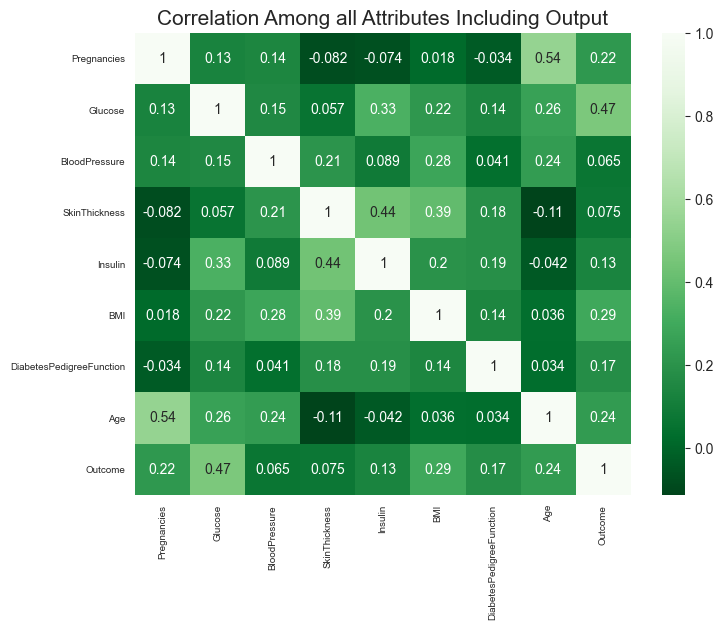

In [8]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(data = df.corr() , annot=True , cmap="Greens_r")
ax.tick_params(axis='x',labelsize=7)
ax.tick_params(axis='y',labelsize=7)
plt.title("Correlation Among all Attributes Including Output",fontsize=15)
plt.show()

# 7. Splitting the dataset into Training and Testing sets

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print("Number of tuples in the entire dataset : ",len(X))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
print("Number of tuples in the training set : ",len(X_train))
print("Number of tuples in the testing set : ",len(X_test))

Number of tuples in the entire dataset :  768
Number of tuples in the training set :  614
Number of tuples in the testing set :  154


# 8. Training KNN Algorithm using original values(not normalized)

In [10]:
train_acc=[]
test_acc=[]
for i in range(1,16):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    # y_pred.append(classifier.predict(X_test))
    train_acc.append(classifier.score(X_train,y_train))
    test_acc.append(classifier.score(X_test,y_test))

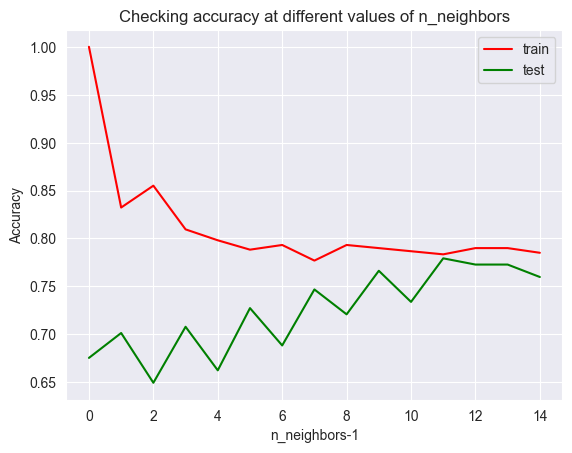

In [11]:
plt.plot(train_acc,c='red')
plt.plot(test_acc,c='green')
plt.xlabel("n_neighbors-1")
plt.ylabel("Accuracy")
plt.title("Checking accuracy at different values of n_neighbors")
plt.legend(['train','test'])
plt.show()

In [12]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [23]:
print("Train Accuracy : ",clf.score(X_train,y_train),"\nTest Accuracy : ",clf.score(X_test,y_test))

Train Accuracy :  0.7833876221498371 
Test Accuracy :  0.7792207792207793


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



### Plotting the confusion matrix

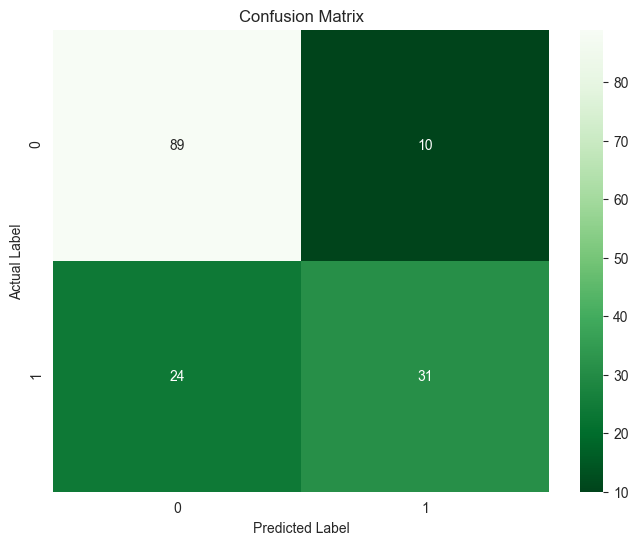

In [15]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap="Greens_r",annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 9. Training the KNN Algorithm using normalized values

### Normalizing training and testing inputs

In [16]:
normalizer = StandardScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [17]:
train_acc_n=[]
test_acc_n=[]
for i in range(1,25):
    classifier_n = KNeighborsClassifier(n_neighbors=i)
    classifier_n.fit(X_train_norm,y_train)
    train_acc_n.append(classifier_n.score(X_train_norm,y_train))
    test_acc_n.append(classifier_n.score(X_test_norm,y_test))

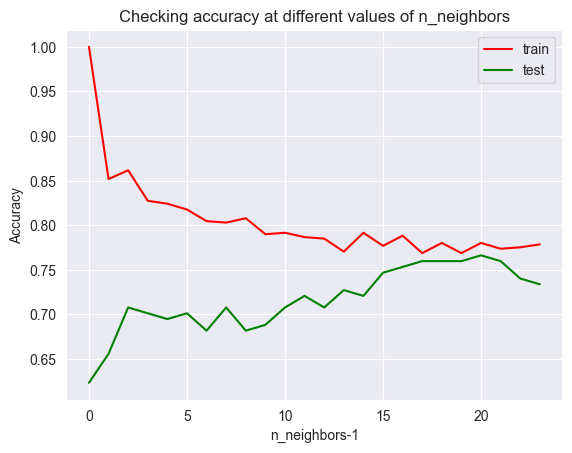

In [18]:
plt.plot(train_acc_n, c='red')
plt.plot(test_acc_n, c='green')
plt.xlabel("n_neighbors-1")
plt.ylabel("Accuracy")
plt.title("Checking accuracy at different values of n_neighbors")
plt.legend(['train', 'test'])
plt.show()

In [19]:
clf_n = KNeighborsClassifier(n_neighbors=21)
clf_n.fit(X_train_norm,y_train)
y_pred_n = clf_n.predict(X_test_norm)

In [25]:
print("Train Accuracy : ",clf_n.score(X_train_norm,y_train),"\nTest Accuracy : ",clf_n.score(X_test_norm,y_test))

Train Accuracy :  0.7801302931596091 
Test Accuracy :  0.7662337662337663


In [24]:
print(classification_report(y_test,y_pred_n))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



### Plotting the confusion matrix

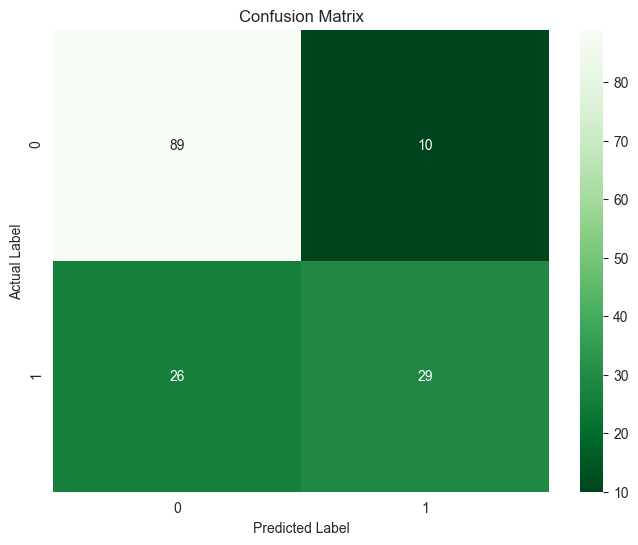

In [21]:
cm_n = confusion_matrix(y_test,y_pred_n)
plt.figure(figsize=(8,6))
sns.heatmap(cm_n,cmap="Greens_r",annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()